In [30]:
import pickle
import dill
import random
import pandas as pd 
from scipy.spatial import distance
import seaborn as sns
import matplotlib.pyplot as plt
from scripts.figmakers.heatmap_ranksign import dfs_to_heatmap
import re

metrics_path=f"results/manipulated_experiments/permutation_manip/metrics.pkl"

with open(metrics_path, "rb") as f:
  metrics=dill.load(f)

### First we load the metrics that were generated with the "weak permutation" as described in the paper and explore their errors.

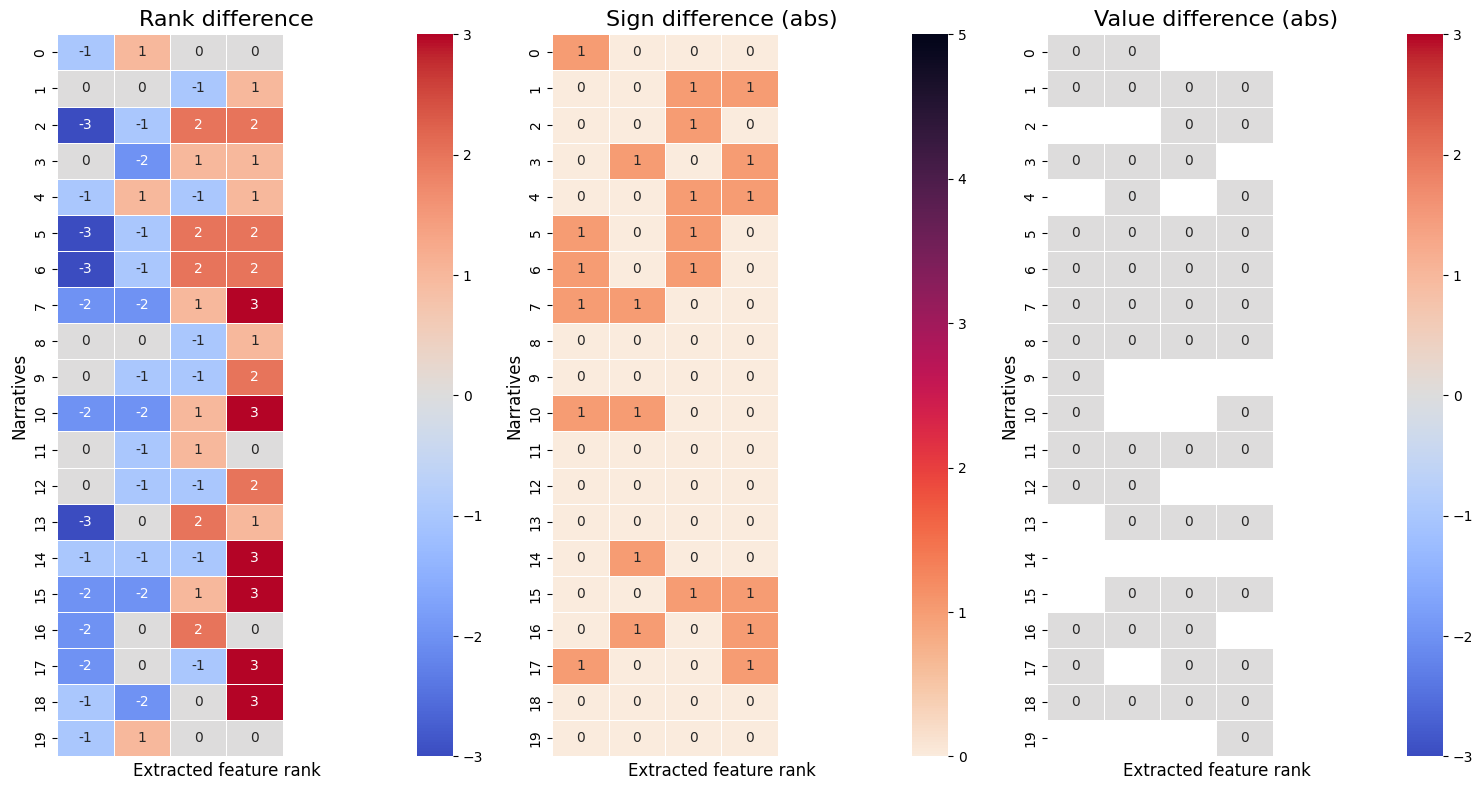

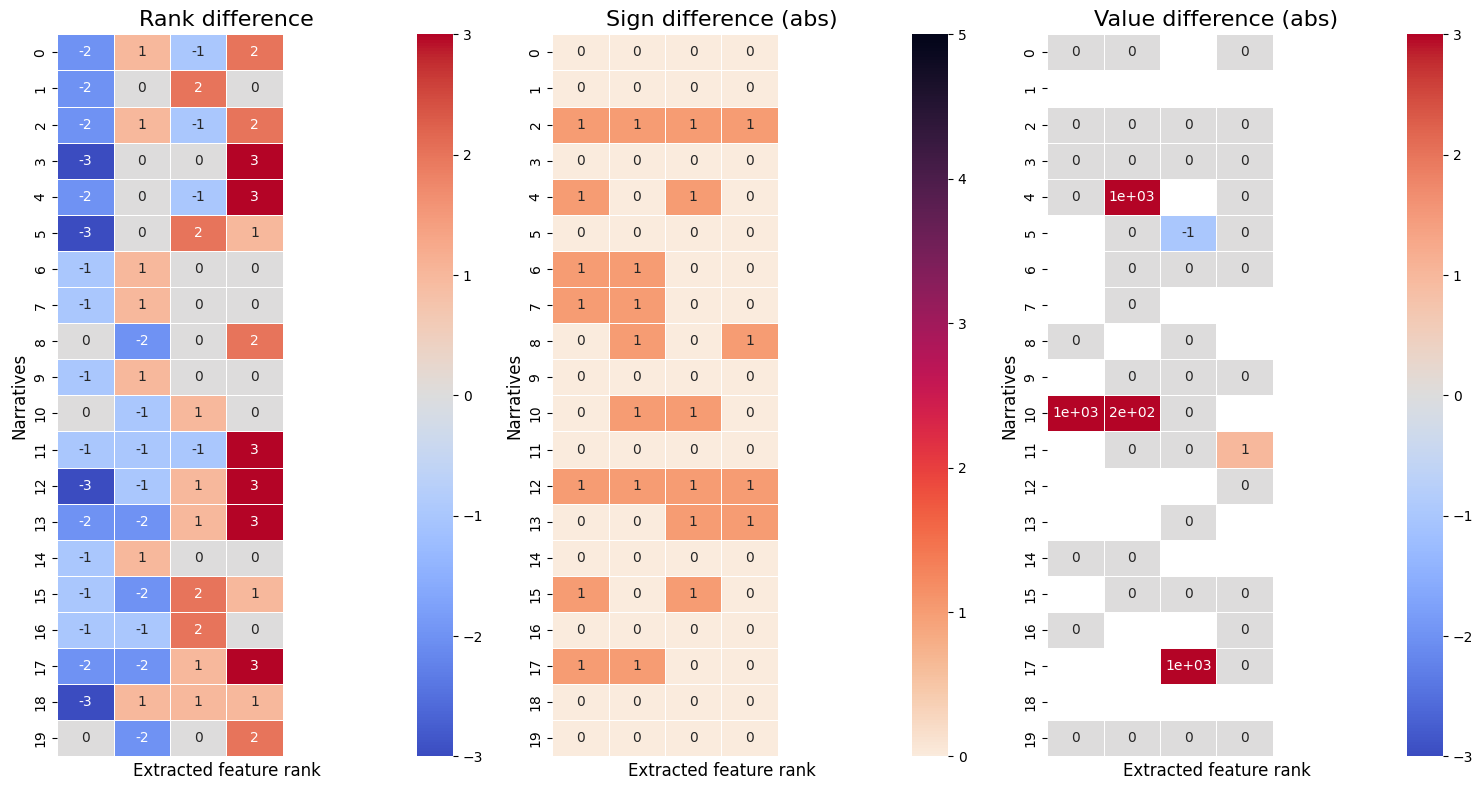

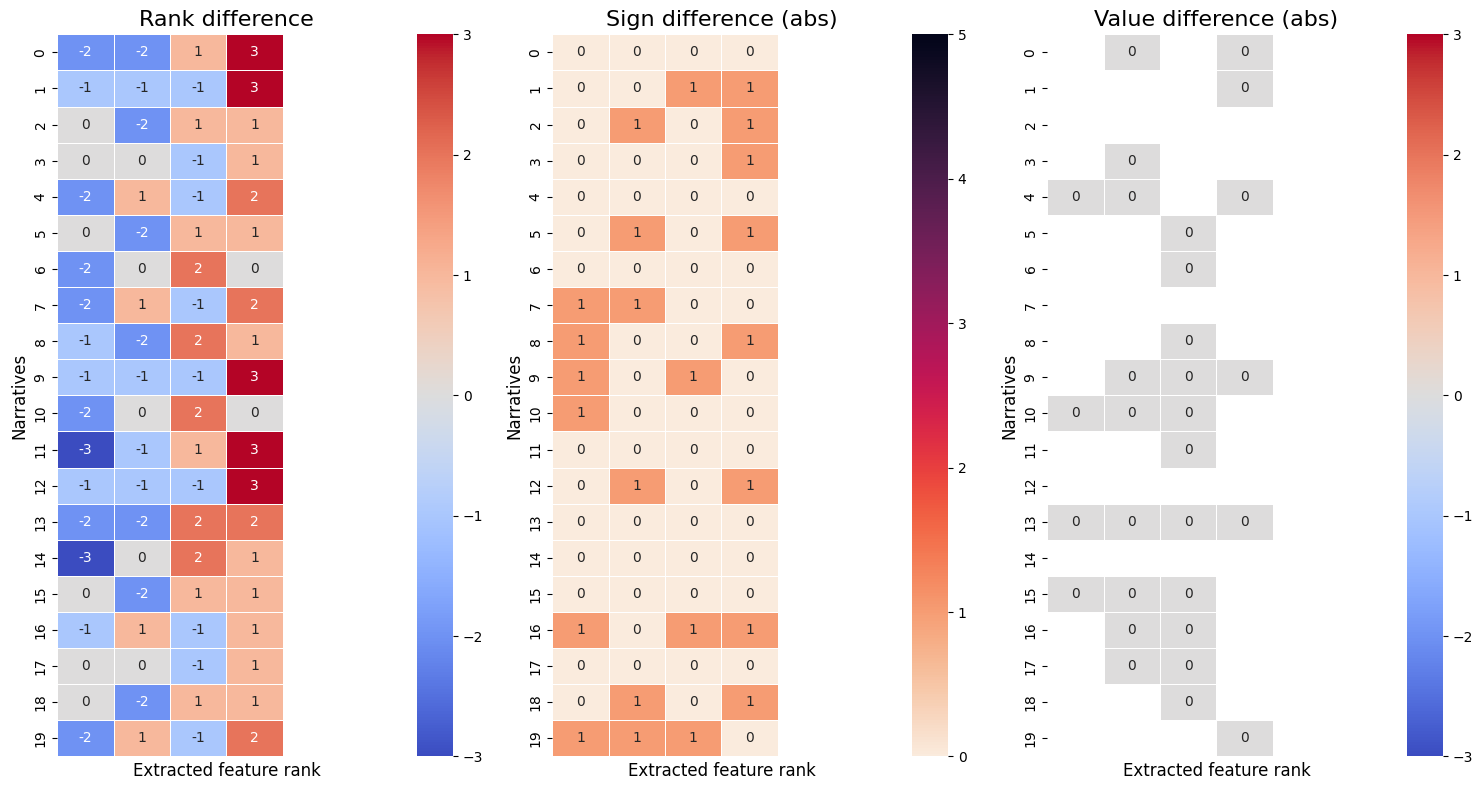

In [11]:
for metric in metrics:
    if metric.generation_model=="gpt-4o":
        fig=dfs_to_heatmap(metric.rank_diff["gpt-4o"], metric.sign_diff["gpt-4o"], metric.value_diff["gpt-4o"])
        plt.show()

### We indeed confirm that every narrative has an error

### Next, we go through the human narratives

credit


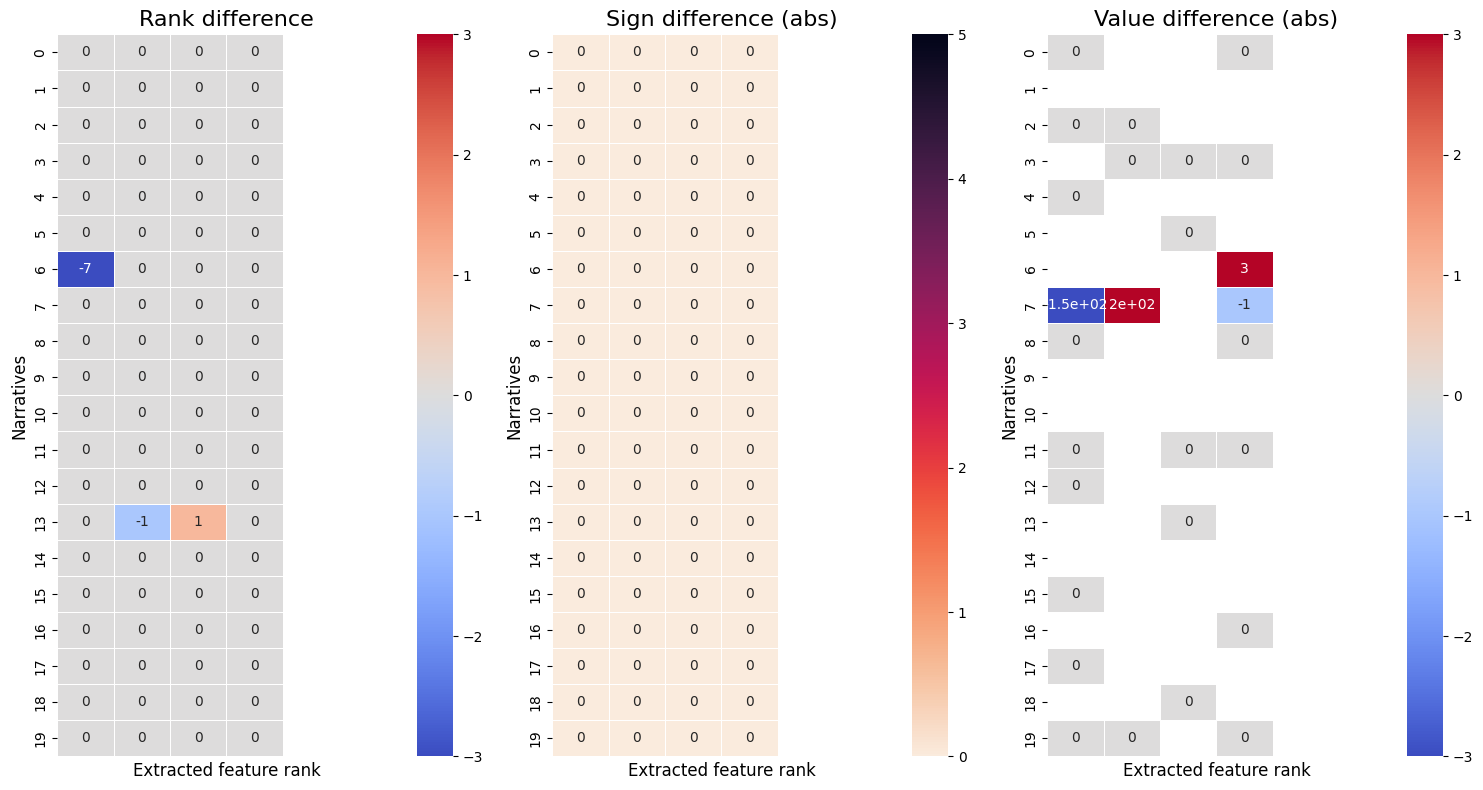

student


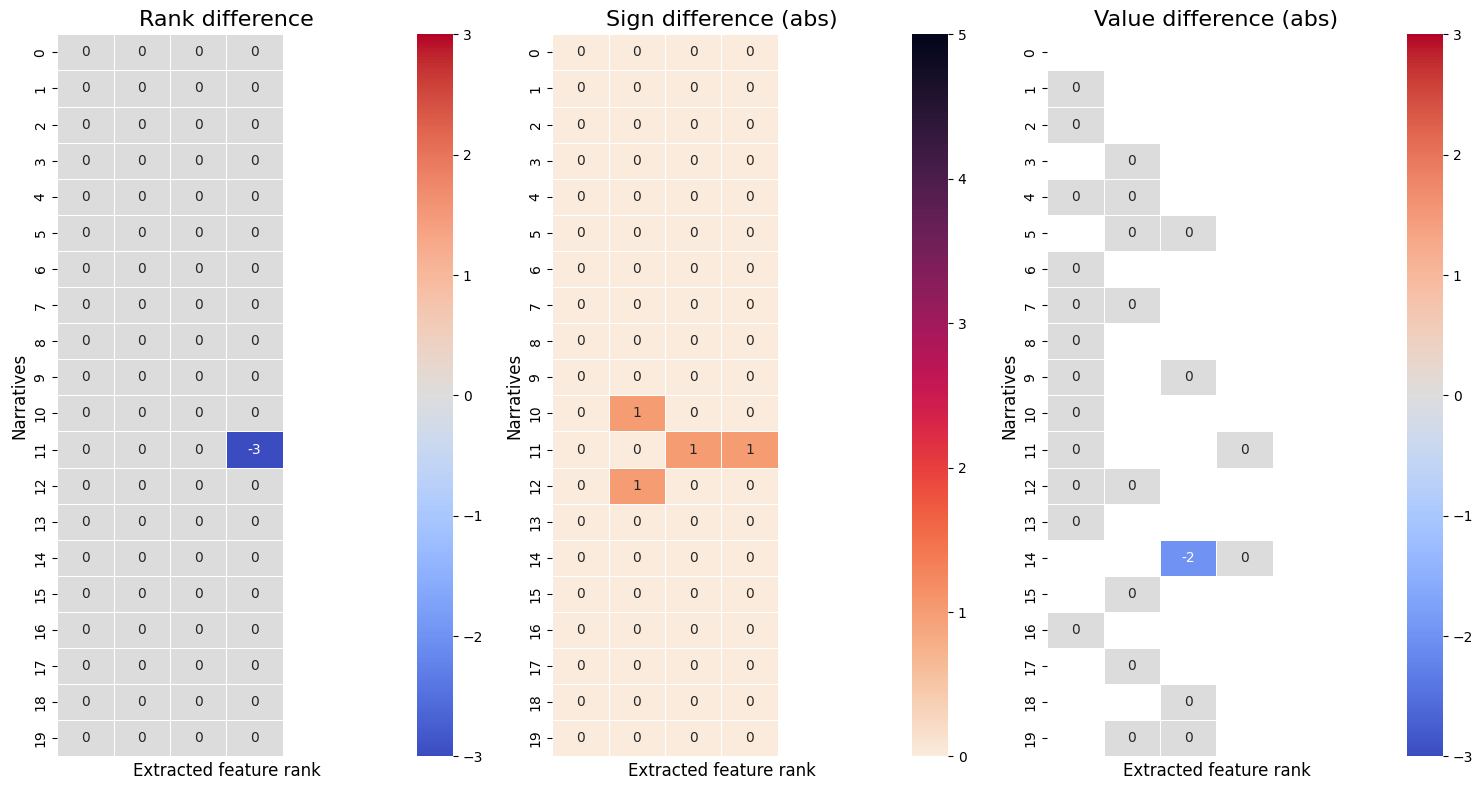

fifa


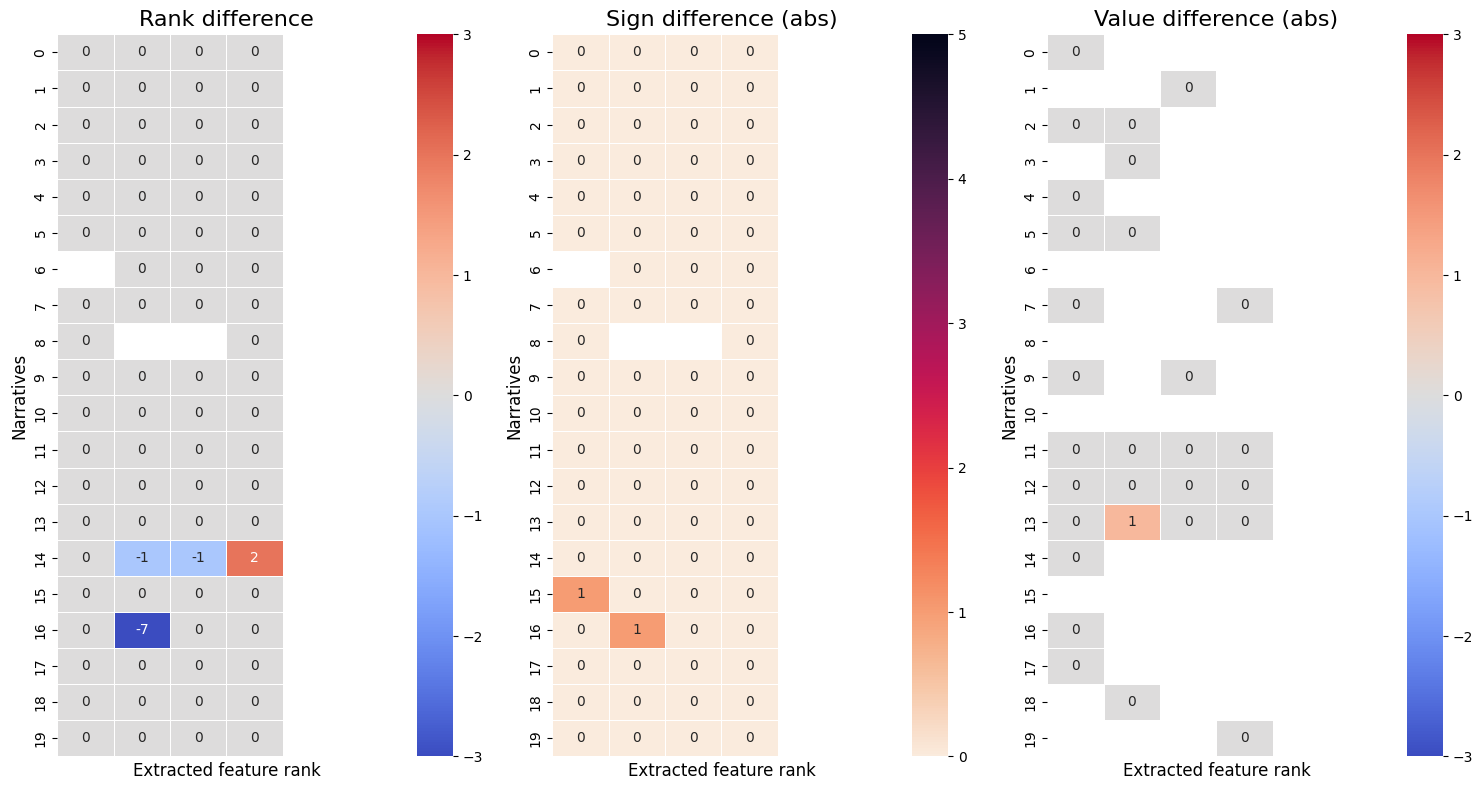

In [14]:
for metric in metrics:
    if metric.generation_model=="human":
        print(metric.dataset)
        fig=dfs_to_heatmap(metric.rank_diff["gpt-4o"], metric.sign_diff["gpt-4o"], metric.value_diff["gpt-4o"])
        plt.show()

In total we count 8 narratives where either the rank or sign were marked as being incorrect, their indices are listed below:

In [15]:
error_idx={
    "fifa": [14,15,16],
    "student": [10,11,12],
    "credit": [6,13]

}

Let us now look through them step by step

### FIFA

In [35]:
ds_name="fifa"
metric=[metric for metric in metrics if (metric.generation_model=="human") & (metric.dataset==ds_name)][0]
narratives=metric.narrative_list
explanations=metric.explanation_list
extractions=metric.extractions_dict["gpt-4o"]

In [41]:
idx_list=error_idx[ds_name]

for idx in idx_list:
    print(f"Index: {idx} \n")
    print( explanations[idx].head(4))
    print("\n")
    print( extractions[idx])
    print("\n")
    print("NARRATIVE: \n")
    narrative_split=re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', narratives[idx])
    for sentence in narrative_split:
        print(sentence)

Index: 14 

      feature_name  SHAP_value  feature_value  feature_average  \
0      Goal Scored   -0.199018              0         1.303922   
1          Blocked   -0.073040              9         3.313725   
2           Passes    0.045395            719       466.794118   
3  Pass Accuracy %    0.038097             88        82.343137   

                                        feature_desc  abs_SHAP  
0  Number of goals scored by the team during the ...  0.199018  
1  Number of shots that were blocked by the oppon...  0.073040  
2           Total number of passes made by the team.  0.045395  
3  Percentage of passes that successfully reached...  0.038097  


{'Goal Scored': {'rank': 0, 'sign': -1, 'value': 0, 'assumption': 'Scoring goals is a very important factor for the decision on the man of the match award.'}, 'Passes': {'rank': 1, 'sign': 1, 'value': 'None', 'assumption': 'An above average number of passes contributes positively towards winning the man of the match award.'}, 'P

Evaluation:

narrative 14: (originally rank error) ambiguous or human error, not possible to extract correct order from narrative 

narrative 15: (originally sign error) clear human error 
 
narrative 16: (originally rank & sign error) -- in my opinion this is an extraction error since "above average number of passes that reached their teammate" refers best to pass accuracy out of all features. 

So far 1 extraction error

### STUDENT

In [42]:
ds_name="student"
metric=[metric for metric in metrics if (metric.generation_model=="human") & (metric.dataset==ds_name)][0]
narratives=metric.narrative_list
explanations=metric.explanation_list
extractions=metric.extractions_dict["gpt-4o"]

In [43]:
idx_list=error_idx[ds_name]

for idx in idx_list:
    print(f"Index: {idx} \n")
    print( explanations[idx].head(4))
    print("\n")
    print( extractions[idx])
    print("\n")
    print("NARRATIVE: \n")
    narrative_split=re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', narratives[idx])
    for sentence in narrative_split:
        print(sentence)

Index: 10 

  feature_name  SHAP_value  feature_value  feature_average  \
0     failures    0.045122              0         0.360759   
1        goout   -0.043976              4         3.098101   
2     absences   -0.036834             14         5.750000   
3   Mjob_other    0.029567              0         0.370253   

                                        feature_desc  abs_SHAP  
0        Number of past class failures (from 0 to 3)  0.045122  
1  Going out with friends (from 1 - very low to 5...  0.043976  
2  Number of school absences (actual number of ab...  0.036834  
3        One-hot variable for mothers's job -- other  0.029567  


{'failures': {'rank': 0, 'sign': 1, 'value': 0, 'assumption': "A history of no past class failures is a strong indication of a student's likelihood to pass."}, 'goout': {'rank': 1, 'sign': 1, 'value': None, 'assumption': "Going out with friends regularly does not negatively influence the student's results."}, 'absences': {'rank': 2, 'sign': -1, 'va